In [1]:
setwd('/import/DB/workdir/cd40/')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
sce = readRDS('./meyloid.rds')

In [3]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
scRNAlist =  SplitObject(sce, split.by = "orig.ident")

In [8]:
scRNA_harmony <- merge(scRNAlist[[1]], y=c(scRNAlist[[2]]))

In [10]:
DefaultAssay(scRNA_harmony) = 'RNA'

In [12]:
library(harmony)

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"


In [13]:

scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  9.228   5.884   7.482 

In [16]:
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)

16:11:25 UMAP embedding parameters a = 0.9922 b = 1.112

16:11:25 Read 12965 rows and found 20 numeric columns

16:11:25 Using Annoy for neighbor search, n_neighbors = 30

16:11:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:11:26 Writing NN index file to temp file /tmp/RtmpxuO9kP/file38fc338b0554a

16:11:26 Searching Annoy index using 1 thread, search_k = 3000

16:11:30 Annoy recall = 100%

16:11:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:11:31 Initializing from normalized Laplacian + noise (using irlba)

16:11:32 Commencing optimization for 200 epochs, with 577176 positive edges

16:11:45 Optimization finished



In [17]:

scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 

#group_by_sample
#plot2 = DimPlot(scRNA_harmony, reduction = "umap", group.by='orig.ident') 

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12965
Number of edges: 418019

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9506
Number of communities: 6
Elapsed time: 3 seconds


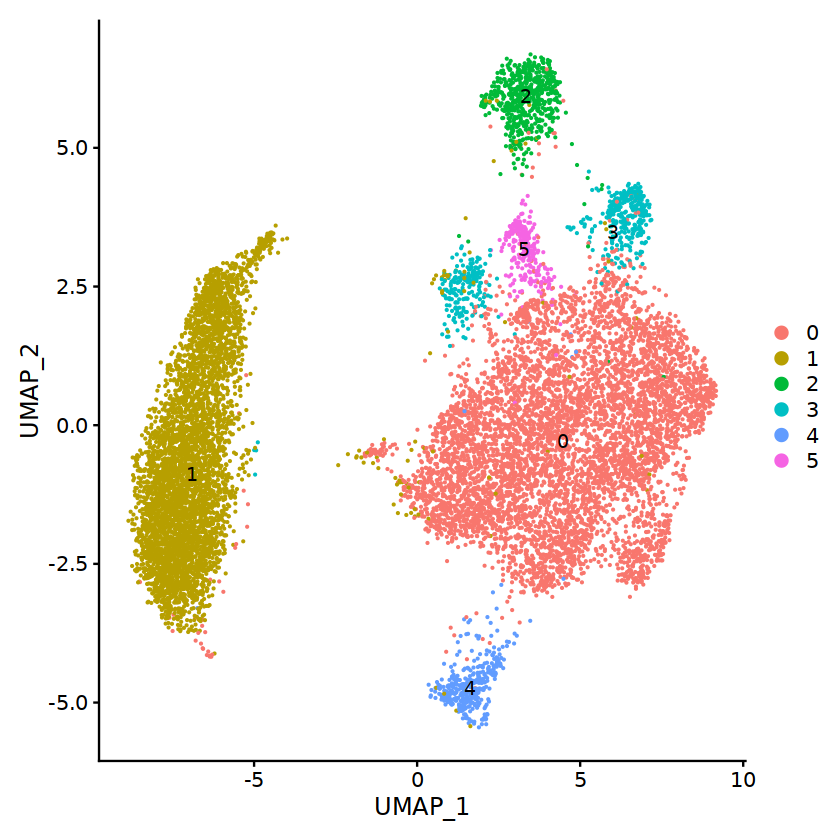

In [18]:
 plot1

In [27]:
DefaultAssay(scRNA_harmony) = 'integrated'

Warning message:
"Could not find Cd40 in the default search locations, found in RNA assay instead"


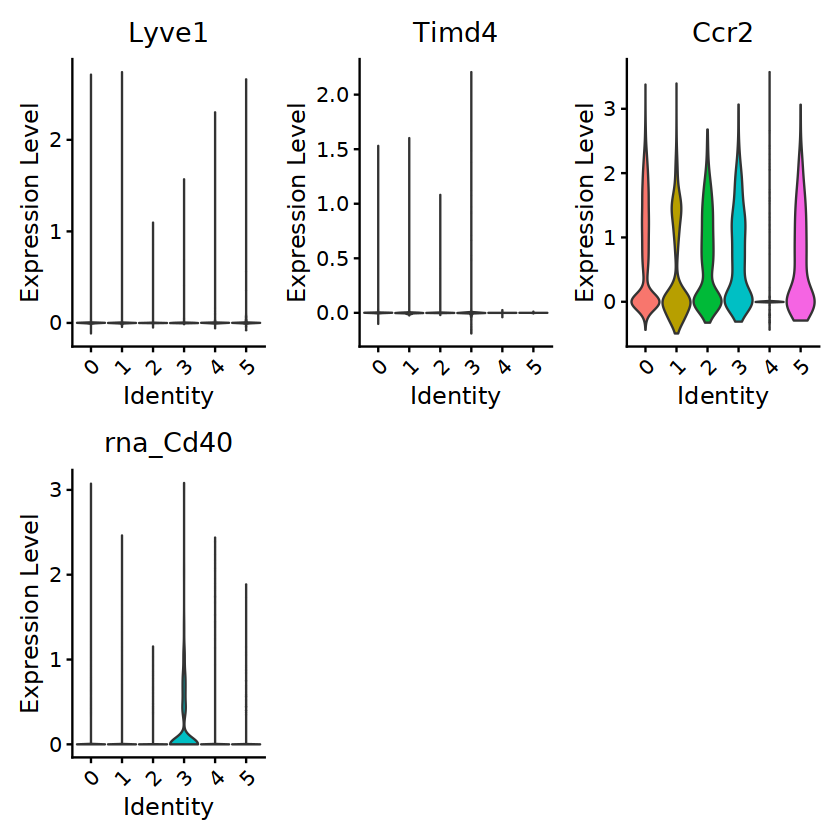

In [29]:
VlnPlot(scRNA_harmony,features = c('Lyve1','Timd4','Ccr2','Cd40'),pt.size = 0)

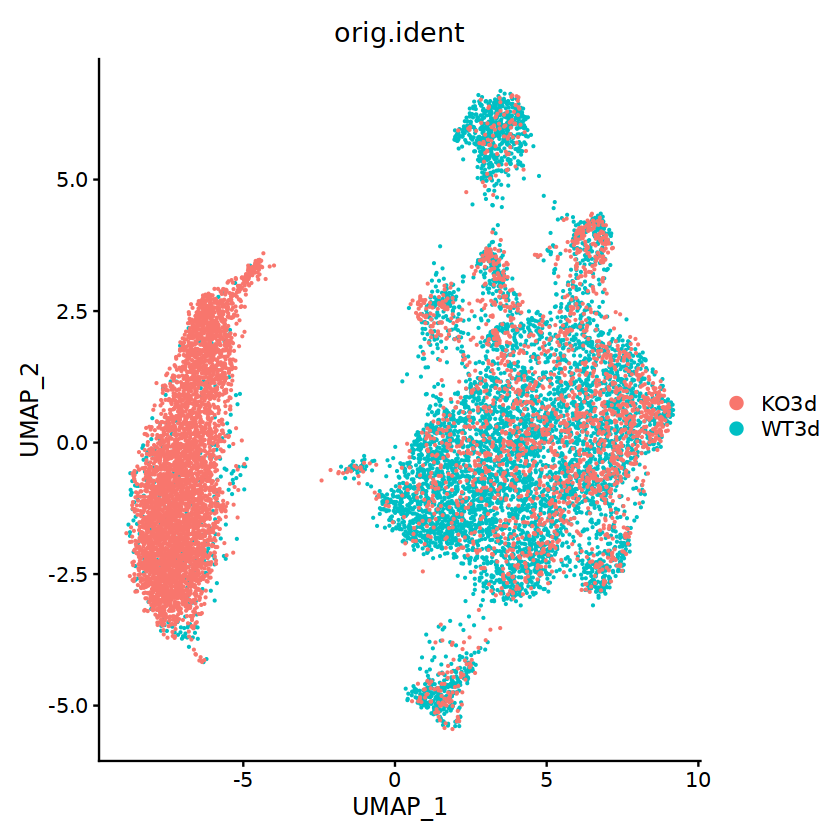

In [20]:
DimPlot(scRNA_harmony, reduction = "umap", group.by = "orig.ident")

In [30]:
#Idents(scRNA_harmony) = 'seurat_clusters'
DefaultAssay(scRNA_harmony) = 'RNA'


sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [33]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)
library(ggplot2)

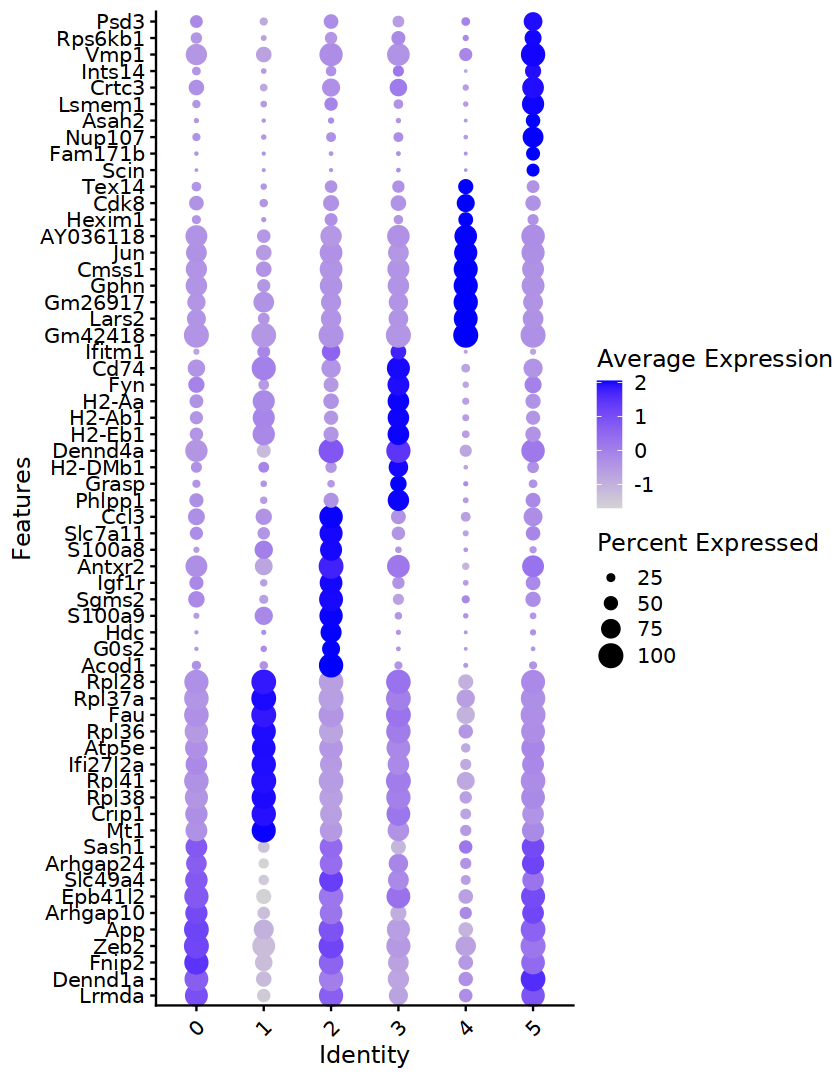

In [34]:
options(repr.plot.height = 9)
# n1 = replace(unique(top5$gene),11:13,c('Cd14','Vcan','Ly6c2'))
# n2 = replace(n1,16:17,c('Spp1','Gpnmb'))
# n3 = replace(n2,40,c('Xcr1'))
DotPlot(scRNA_harmony, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))